# Linear Regression 

## import library

In [77]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data 

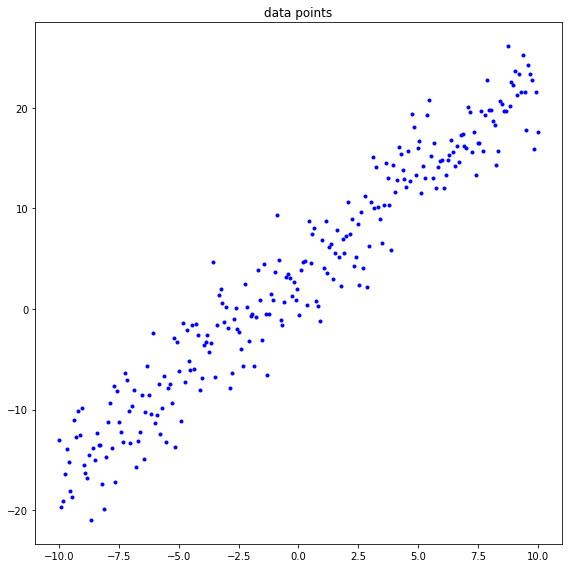

In [78]:
filename    = 'assignment_06_data.csv'
data_load   = np.loadtxt(filename, delimiter = ',')

x   = data_load[0, :]
y   = data_load[1, :]

plt.figure(figsize=(8,8))

plt.plot(x, y, '.', color = 'blue')
plt.title('data points')

plt.tight_layout()
plt.show()

## compute the loss function

In [216]:
def compute_loss(x, y, theta0, theta1):
    loss = y - (theta0 + theta1 * x)
    loss_square = np.square(loss)
    loss_1 = np.sum(loss_square)/(2*len(x))
    return loss_1


## compute the gradient for each model parameter

In [203]:
def compute_gradient_theta0(x, y, theta0, theta1):
    loss_1 = y - (theta0 + theta1 * x)
    loss = np.sum(loss_1)
    dL = (2/len(x))*(-loss)
    return dL

In [204]:
def compute_gradient_theta1(x, y, theta0, theta1):
    loss_1 = y - (theta0 + theta1 * x)
    loss_2 = loss_1 * x
    loss = np.sum(loss_2)
    dL = (2/len(x))*(-loss)
    return dL

## gradient descent for each model parameter

In [218]:
num_iteration       = 1000
learning_rate       = 0.01

theta0              = 0
theta1              = 0
theta0_iteration    = np.zeros(num_iteration)
theta1_iteration    = np.zeros(num_iteration)
loss_iteration      = np.zeros(num_iteration)

for i in range(num_iteration):

    theta0  = theta0 - learning_rate * compute_gradient_theta0(x, y, theta0, theta1)
    theta1  = theta1 - learning_rate * compute_gradient_theta1(x, y, theta0, theta1)
    loss    = compute_loss(x, y, theta0, theta1)

    theta0_iteration[i] = theta0
    theta1_iteration[i] = theta1
    loss_iteration[i]   = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 16.69533
iteration =    1, loss = 10.11997
iteration =    2, loss = 9.24275
iteration =    3, loss = 8.98567
iteration =    4, loss = 8.80178
iteration =    5, loss = 8.63196
iteration =    6, loss = 8.46959
iteration =    7, loss = 8.31373
iteration =    8, loss = 8.16405
iteration =    9, loss = 8.02030
iteration =   10, loss = 7.88225
iteration =   11, loss = 7.74966
iteration =   12, loss = 7.62232
iteration =   13, loss = 7.50002
iteration =   14, loss = 7.38257
iteration =   15, loss = 7.26977
iteration =   16, loss = 7.16143
iteration =   17, loss = 7.05739
iteration =   18, loss = 6.95746
iteration =   19, loss = 6.86149
iteration =   20, loss = 6.76932
iteration =   21, loss = 6.68081
iteration =   22, loss = 6.59579
iteration =   23, loss = 6.51415
iteration =   24, loss = 6.43573
iteration =   25, loss = 6.36043
iteration =   26, loss = 6.28810
iteration =   27, loss = 6.21864
iteration =   28, loss = 6.15193
iteration =   29, loss = 6.08786
iteratio

In [207]:
f = theta0_iteration[-1] + theta1_iteration[-1] * x

## plot the results

In [208]:
def plot_data_regression(x, y, f):

    plt.figure(figsize=(8,6))
    plt.title('linear regression result')
    plt.plot(x, y, '.', color='blue')
    plt.plot(x, f, '-', color='red')
    
    plt.tight_layout()
    plt.show()

In [209]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss curve')
    plt.plot(index, loss_iteration, '-', color='red')
    
    plt.tight_layout()
    plt.show()

In [210]:

def plot_model_parameter(theta0_iteration, theta1_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    plt.plot(index, theta0_iteration, '-', color='blue')
    plt.plot(index, theta1_iteration, '-', color='green')

    plt.tight_layout()
    plt.show()

In [212]:
X0  = np.arange(-10, 10, 0.1)
X1  = np.arange(-10, 10, 0.1)
grid_loss  = np.zeros((200,200))
grid_theta0, grid_theta1 = np.meshgrid(X0, X1)

for i in range(200):
    for j in range(200):
        loss = compute_loss(x, y, grid_theta0[i][j], grid_theta1[i][j])
        grid_loss[i][j]   = loss
        
def plot_loss_surface(grid_theta0, grid_theta1, grid_loss):

    fig = plt.figure(figsize=(8,8))
    ax3d = plt.axes(projection="3d")
    plt.title('loss surface')
    ax3d.plot_surface(grid_theta0, grid_theta1, grid_loss,cmap='plasma')

    plt.tight_layout()
    plt.show()

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point and the regression result in red curve

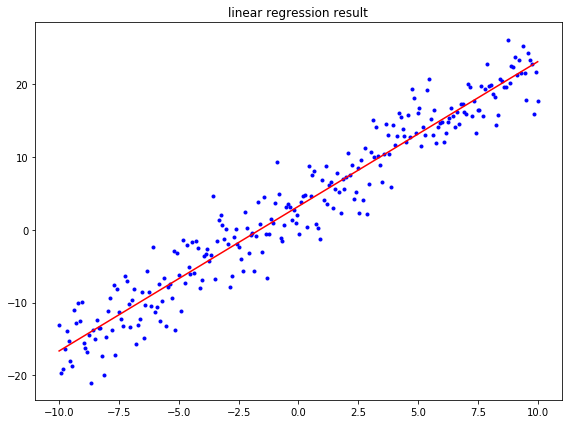

In [213]:
plot_data_regression(x, y, f)

### # 02. plot the values of the model parameters $\theta_0$ in blue curve and $\theta_1$ in green curve over the gradient descent iterations

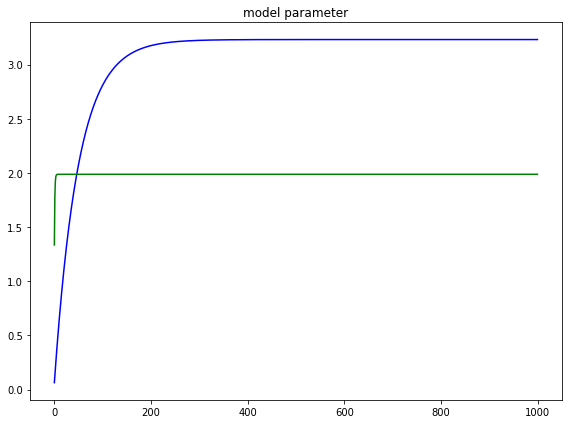

In [214]:
plot_model_parameter(theta0_iteration, theta1_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

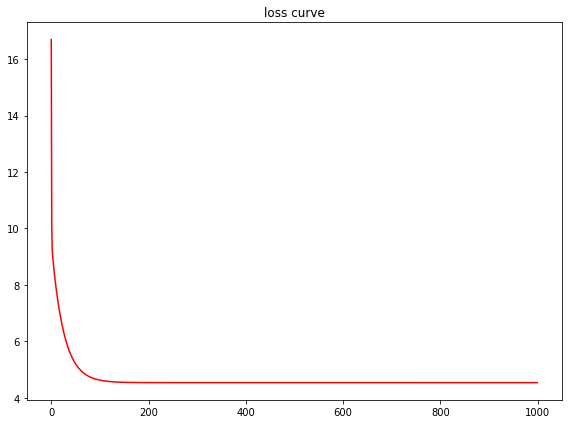

In [219]:
plot_loss_curve(loss_iteration)

### # 04. plot the loss surface in 3-dimension surface where $x$-axis represents $\theta_0$, $y$-axis represents $\theta_1$ and $z$-axis represents $\mathcal{L}$

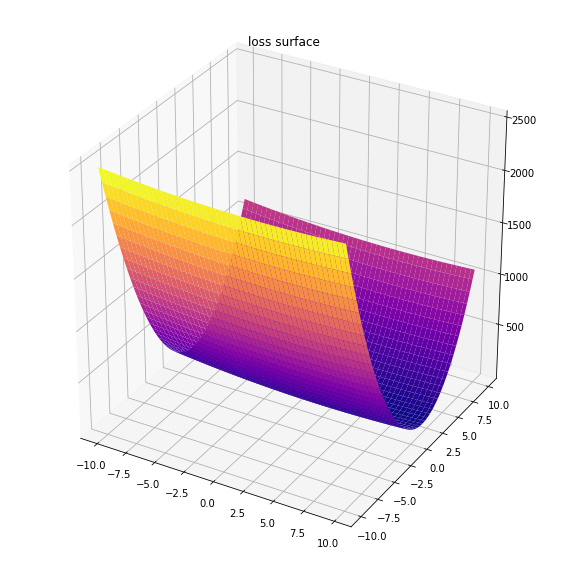

In [201]:
plot_loss_surface(grid_theta0, grid_theta1, grid_loss)